# Exploratory Data Analysis

In [163]:
import pandas as pd
df=pd.read_csv(r"C:\Users\K6502\OneDrive\Desktop\TFM\datos\clean\final_df.csv")

1) check for null values

In [164]:
import numpy as np

# Missing values
df.isnull().sum()

dname_drug1                    0
molecular_formula_drug1        0
smiles_drug1                   0
dname_drug2                    0
molecular_formula_drug2        0
smiles_drug2                   0
cell_line_name                 0
disease_cui                    0
latent_0_drug1                 0
latent_1_drug1                 0
latent_2_drug1                 0
latent_3_drug1                 0
latent_4_drug1                 0
latent_0_drug2                 0
latent_1_drug2                 0
latent_2_drug2                 0
latent_3_drug2                 0
latent_4_drug2                 0
drug1_target_count             0
drug2_target_count             0
proteins_in_LCC                0
oc_drug1_drug2                 0
oc_dis_drug1                   0
oc_dis_drug2                   0
ji_drug1_drug2                 0
ji_dis_drug1                   0
ji_dis_drug2                   0
min_spl_dis_dru1               0
Closest_distance_dis_dru1      0
Dc_mean_dis_dru1               0
Dc_std_dis

2)  see the inf values

In [165]:
inf_counts = np.isinf(numeric_cols.values).sum(axis=0)
pd.Series(inf_counts, index=numeric_cols.columns)

latent_0_drug1                 0
latent_1_drug1                 0
latent_2_drug1                 0
latent_3_drug1                 0
latent_4_drug1                 0
latent_0_drug2                 0
latent_1_drug2                 0
latent_2_drug2                 0
latent_3_drug2                 0
latent_4_drug2                 0
drug1_target_count             0
drug2_target_count             0
proteins_in_LCC                0
oc_drug1_drug2                 0
oc_dis_drug1                   0
oc_dis_drug2                   0
ji_drug1_drug2                 0
ji_dis_drug1                   0
ji_dis_drug2                   0
min_spl_dis_dru1               0
Closest_distance_dis_dru1      0
Dc_mean_dis_dru1               0
Dc_std_dis_dru1                0
Dc_zscore_dis_dru1             0
min_spl_dis_dru2               0
Closest_distance_dis_dru2      0
Dc_mean_dis_dru2               0
Dc_std_dis_dru2                0
Dc_zscore_dis_dru2             0
min_spl_dru1_dru2              0
obs_sep_dr

**Check why of nan and inf values**

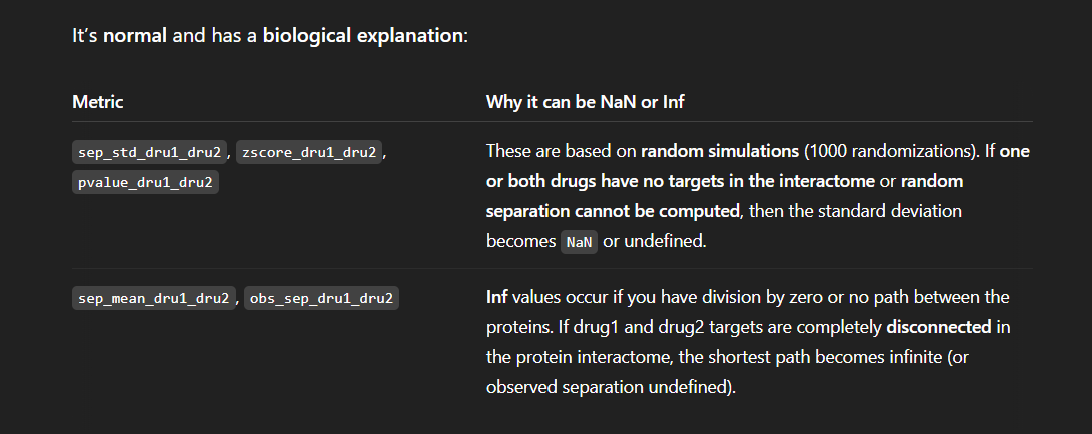

In [166]:
# Check how many rows have zero targets --> it would be expected to have a nan value 
zero_target_drug1 = (df['drug1_target_count'] == 0).sum()
zero_target_drug2 = (df['drug2_target_count'] == 0).sum()
print(f'Drug1 with 0 targets: {zero_target_drug1}')
print(f'Drug2 with 0 targets: {zero_target_drug2}')


Drug1 with 0 targets: 0
Drug2 with 0 targets: 0


In [167]:
# Check no links
no_links_drug1 = (df['ratio_links_dis_dru1'] == 0).sum()
no_links_drug2 = (df['ratio_links_dis_dru2'] == 0).sum()
print(f'Drug1 with no links to disease: {no_links_drug1}')
print(f'Drug2 with no links to disease: {no_links_drug2}')
##this can be a reason for inf 

Drug1 with no links to disease: 165
Drug2 with no links to disease: 164


we can see the rows with nan normally also have inf values lets see if all of them 

In [168]:
# List of network medicine columns
network_cols = [
    'min_spl_dis_dru1', 'Closest_distance_dis_dru1', 'Dc_mean_dis_dru1', 'Dc_std_dis_dru1', 'Dc_zscore_dis_dru1',
    'min_spl_dis_dru2', 'Closest_distance_dis_dru2', 'Dc_mean_dis_dru2', 'Dc_std_dis_dru2', 'Dc_zscore_dis_dru2',
    'min_spl_dru1_dru2', 'obs_sep_dru1_dru2', 'sep_mean_dru1_dru2', 'sep_std_dru1_dru2', 'zscore_dru1_dru2', 'pvalue_dru1_dru2',
    'ratio_links_dis_dru1', 'ratio_links_dis_dru2'
]

# Filter rows with at least one NaN in the network columns
rows_with_nan_in_network = df[df[network_cols].isnull().any(axis=1)]

# Display only the network medicine columns
rows_with_nan_in_network[network_cols]



min_spl_dis_dru1  Closest_distance_dis_dru1  Dc_mean_dis_dru1  \
0                 2.0                        2.0             1.642   
1                 2.0                        2.0             1.642   
2                 2.0                        2.0             1.642   
3                 2.0                        2.0             1.642   
4                 2.0                        2.0             1.642   
..                ...                        ...               ...   
990               0.0                        0.5             1.128   
991               1.0                        1.0             1.108   
992               1.0                        1.0             1.129   
993               0.0                        0.0             0.902   
994               0.0                        0.0             0.893   

     Dc_std_dis_dru1  Dc_zscore_dis_dru1  min_spl_dis_dru2  \
0           0.487684            0.734081               1.0   
1           0.487684            0.734081               1.0   
2           0.487684            0.734081               0.0   
3           0.487684            0.734081               0.0   
4           0.487684            0.734081               0.0   
..               ...                 ...               ...   
990         0.158830           -3.953902               2.0   
991         0.369237           -0.292495               1.0   
992         0.410316           -0.314392               1.0   
993         0.297315           -3.033823               2.0   
994         0.309113           -2.888909               2.0   

     Closest_distance_dis_dru2  Dc_mean_dis_dru2  Dc_std_dis_dru2  \
0                          1.0          1.044333         0.176166   
1                          1.0          1.008900         0.093866   
2                          0.0          1.297000         0.277112   
3                          0.0          0.914500         0.194781   
4                          0.9          1.113500         0.124047   
..                         ...               ...              ...   
990                        2.0          1.608000         0.514136   
991                        1.0          1.030333         0.182184   
992                        1.0          1.044333         0.176166   
993                        2.0          1.608000         0.514136   
994                        2.0          1.642000         0.487684   

     Dc_zscore_dis_dru2  min_spl_dru1_dru2  obs_sep_dru1_dru2  \
0             -0.251656                2.0               -inf   
1             -0.094816                2.0               -inf   
2             -4.680420                2.0               -inf   
3             -4.695010                2.0               -inf   
4             -1.721117                2.0               -inf   
..                  ...                ...                ...   
990            0.762444                2.0               -inf   
991           -0.166498                2.0               -inf   
992           -0.251656                2.0               -inf   
993            0.762444                2.0               -inf   
994            0.734081                2.0               -inf   

     sep_mean_dru1_dru2  sep_std_dru1_dru2  zscore_dru1_dru2  \
0                  -inf                NaN               NaN   
1                  -inf                NaN               NaN   
2                  -inf                NaN               NaN   
3                  -inf                NaN               NaN   
4                  -inf                NaN               NaN   
..                  ...                ...               ...   
990                -inf                NaN               NaN   
991                -inf                NaN               NaN   
992                -inf                NaN               NaN   
993                -inf                NaN               NaN   
994                -inf                NaN               NaN   

     pvalue_dru1_dru2  ratio_links_dis_d

In [169]:
# Select only numeric columns from rows_with_nan_in_network
numeric_rows_with_nan = rows_with_nan_in_network.select_dtypes(include=[np.number])

# Now safely check for inf
cols_with_inf = numeric_rows_with_nan.columns[
    np.isinf(numeric_rows_with_nan.values).any(axis=0)
]

# Show only the columns that have inf values
rows_with_nan_in_network[cols_with_inf].shape 


(565, 2)

as we can see they are the same ones

In [170]:
# Save the DataFrame to a CSV file
rows_with_nan_in_network.to_csv(r"C:\Users\K6502\OneDrive\Desktop\TFM\datos\clean\rows_with_nan_in_network.csv", index=False) ##save it so chat can give an explanation 

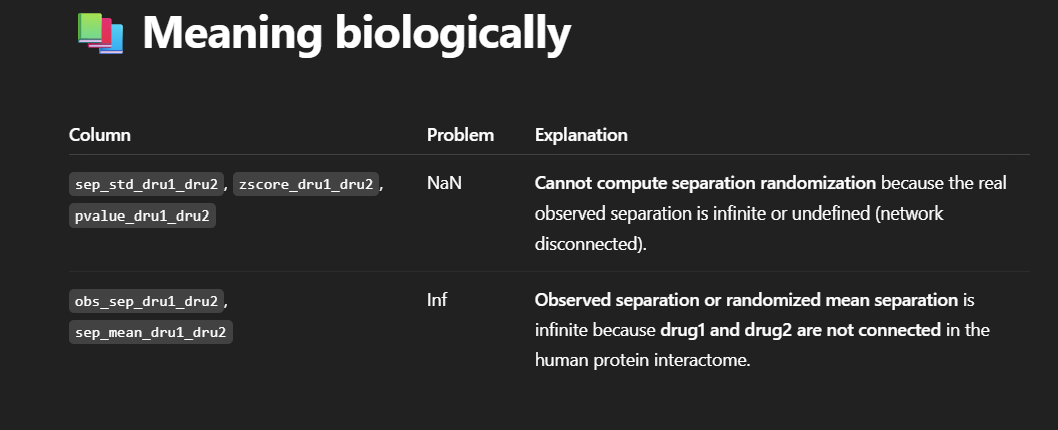

In these cases, drug1 and drug2 do not have paths connecting them via the protein interactome.
That’s why:

* The observed separation (obs_sep_dru1_dru2) is Inf (no finite path exists).
* The random mean separation (sep_mean_dru1_dru2) is also Inf.
* Consequently, standard deviation (sep_std_dru1_dru2) cannot be computed → NaN.
* Then, z-score and p-value (zscore_dru1_dru2, pvalue_dru1_dru2) cannot be computed either → NaN.

WHY??
1) Because in network medicine, if two sets of proteins (targets of drug1 and drug2) are totally disconnected, the minimum path length is undefined (=∞).
2)  Then you cannot compute proximity, randomize separations, or derive any statistical scores.


In [171]:
# See basic statistics of min_spl_dru1_dru2
rows_with_nan_in_network['min_spl_dru1_dru2'].describe()

count    565.000000
mean       2.290265
std        0.744241
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: min_spl_dru1_dru2, dtype: float64

In [172]:
# See basic statistics of min_spl_dru1_dru2
df['min_spl_dru1_dru2'].describe()

count    995.000000
mean       1.974874
std        0.846565
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: min_spl_dru1_dru2, dtype: float64

this is not the case, actually the mean is larguer

For now we are goiing to drop these 5 columns and work with the rest of them 

In [173]:
import numpy as np

# 1. Replace inf with NaN temporarily (so we can handle both together easily)
df_cleaned = df.replace([np.inf, -np.inf], np.nan)

# 2. Find columns that have any NaN values
cols_with_nan_or_inf = df_cleaned.columns[df_cleaned.isnull().any(axis=0)]

# 3. Drop these columns
df_cleaned = df_cleaned.drop(columns=cols_with_nan_or_inf)
df=df_cleaned

# 4. Done!
print(f"Dropped columns: {list(cols_with_nan_or_inf)}")
print(f"Shape of cleaned dataset: {df_cleaned.shape}")


Dropped columns: ['obs_sep_dru1_dru2', 'sep_mean_dru1_dru2', 'sep_std_dru1_dru2', 'zscore_dru1_dru2', 'pvalue_dru1_dru2']
Shape of cleaned dataset: (995, 44)


3) See statistics of the target variables 

In [174]:
df[['synergy_zip', 'synergy_loewe', 'synergy_hsa', 'synergy_bliss']].describe()

synergy_zip  synergy_loewe  synergy_hsa  synergy_bliss
count   995.000000     995.000000   995.000000     995.000000
mean      0.544643      -6.452322     0.691722       1.677314
std       4.576828      13.266606     5.551672       5.068681
min     -15.361823     -74.931844   -22.210665     -23.174376
25%      -2.094431      -8.852971    -2.621759      -1.499642
50%       0.351656      -3.044345     0.126004       1.483212
75%       2.943635       0.840143     3.477150       4.483336
max      21.775291      23.482903    27.318419      20.826499

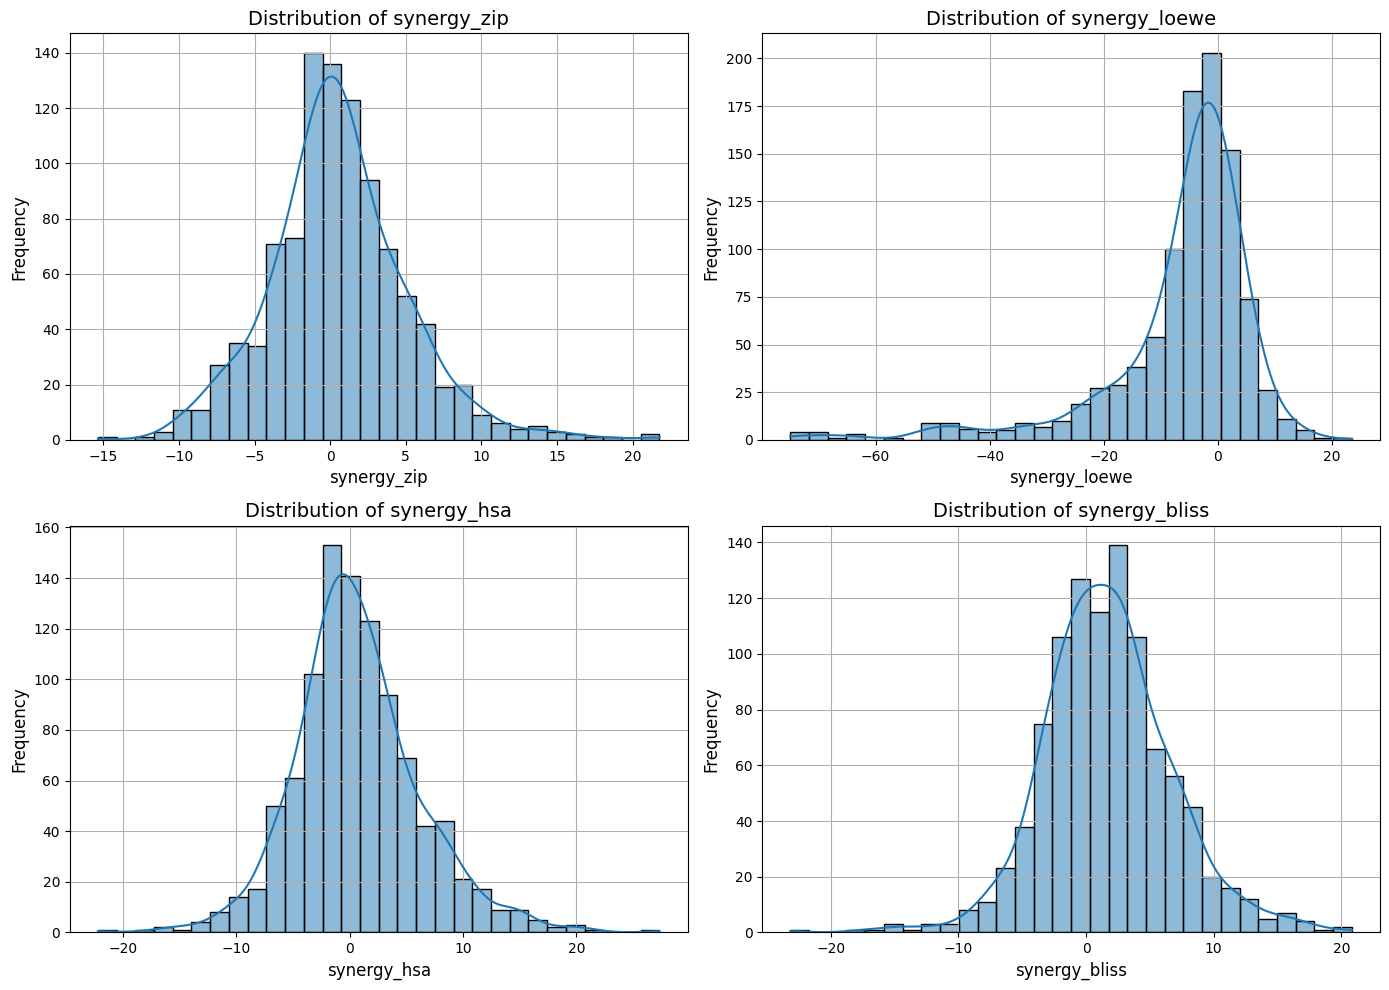

In [175]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define targets
targets = ['synergy_zip', 'synergy_loewe', 'synergy_hsa', 'synergy_bliss']

# Create a 2x2 grid for the 4 plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each target
for idx, target in enumerate(targets):
    sns.histplot(df[target], kde=True, bins=30, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {target}', fontsize=14)
    axes[idx].set_xlabel(target, fontsize=12)
    axes[idx].set_ylabel('Frequency', fontsize=12)
    axes[idx].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


## Numerical features

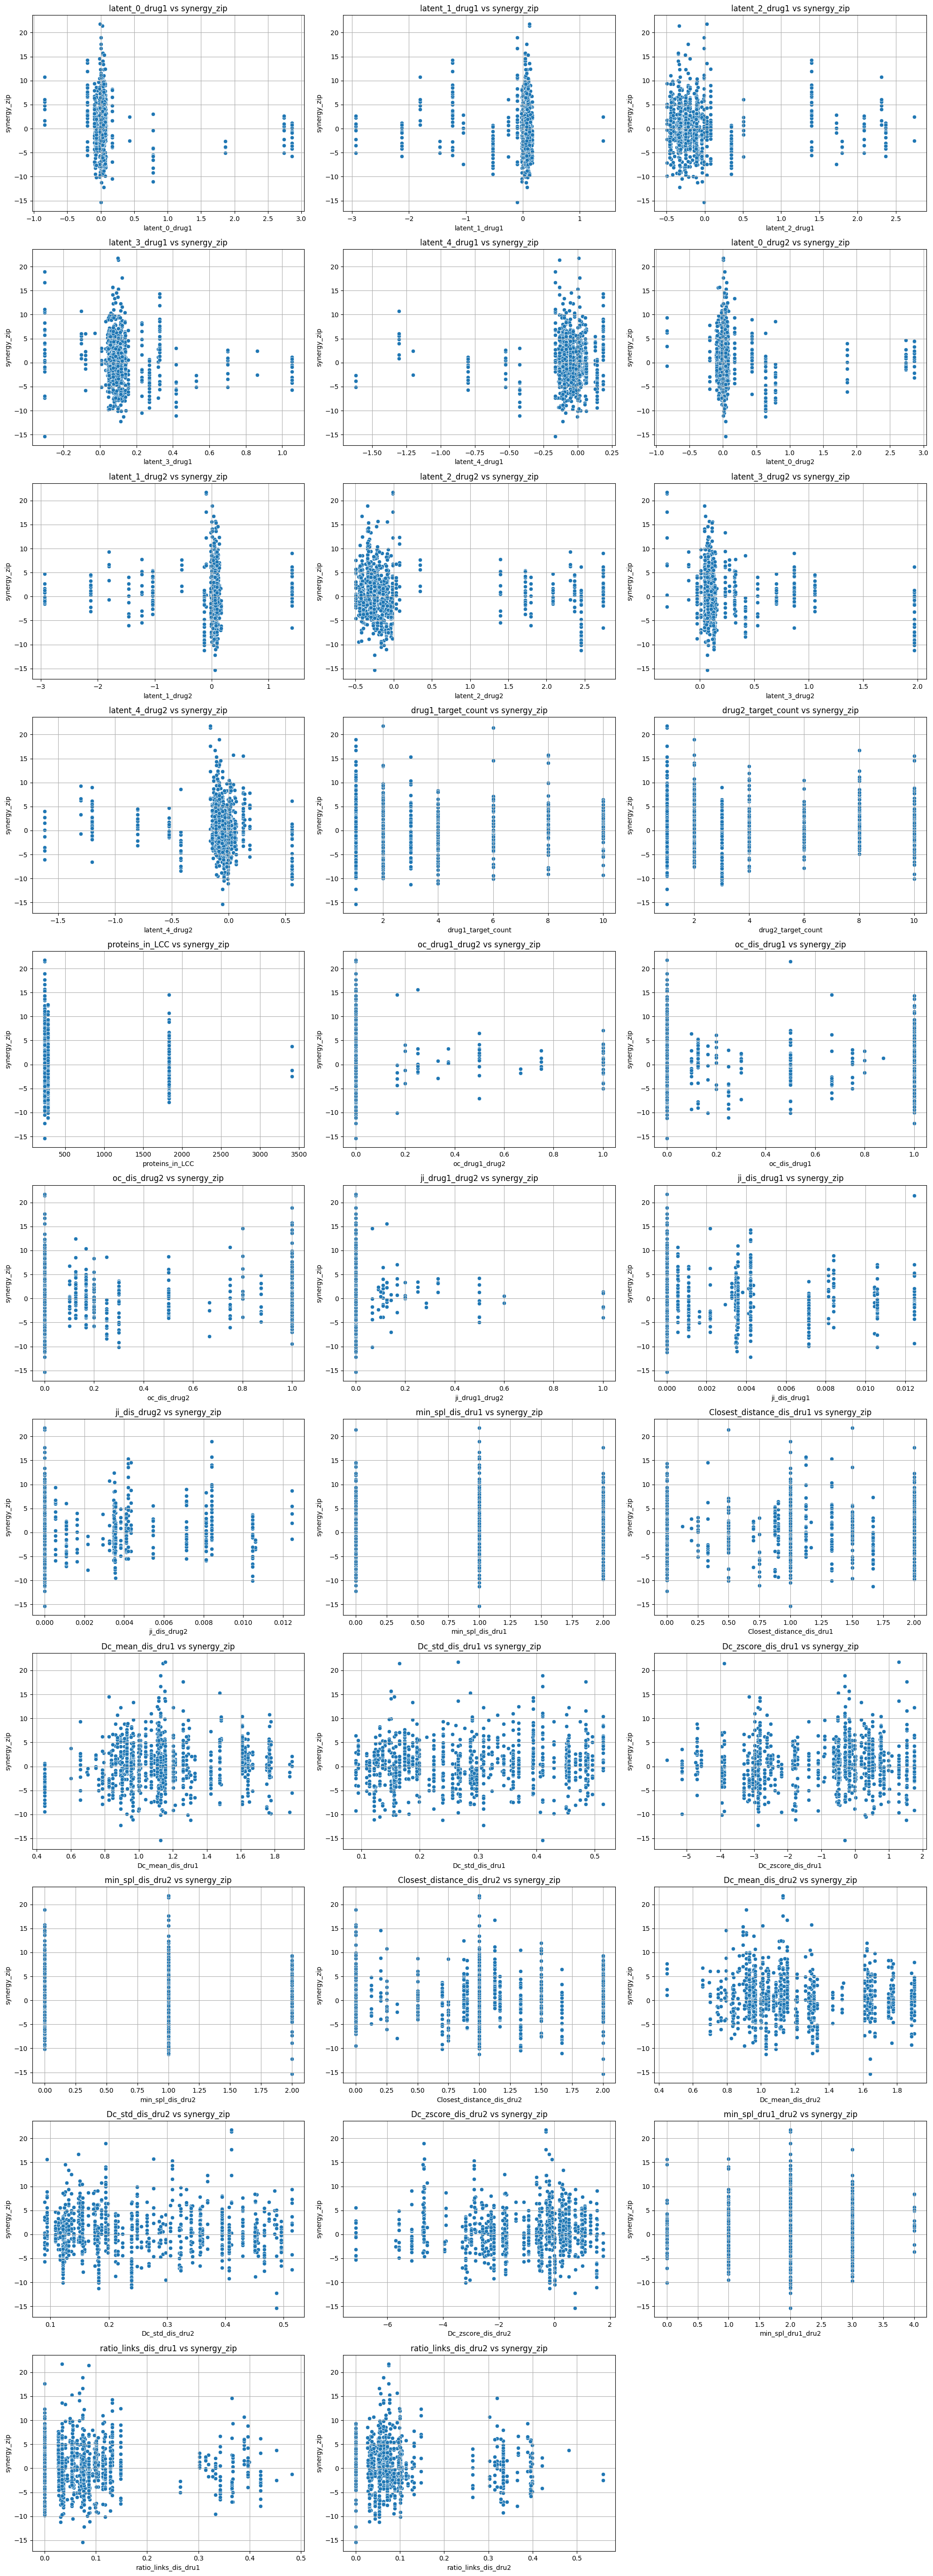

In [176]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the target variable
target = 'synergy_zip'

# Select numerical columns (exclude target columns)
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_cols = [col for col in numerical_cols if col not in ['synergy_zip', 'synergy_loewe', 'synergy_hsa', 'synergy_bliss']]

# Set up the grid
n_cols = 3  # number of plots per row
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols  # number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))
axes = axes.flatten()  # flatten so we can index easily

# Plot each scatterplot
for idx, feature in enumerate(numerical_cols):
    sns.scatterplot(data=df, x=feature, y=target, ax=axes[idx])
    axes[idx].set_title(f'{feature} vs {target}')
    axes[idx].grid(True)

# Remove empty subplots
for i in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[i])


plt.tight_layout()
# Save the figure
plt.savefig(r"C:\Users\K6502\OneDrive\Desktop\TFM\datos\clean\images\scatterplots_vs_synergy_zip.png", dpi=300, bbox_inches='tight')
plt.show()


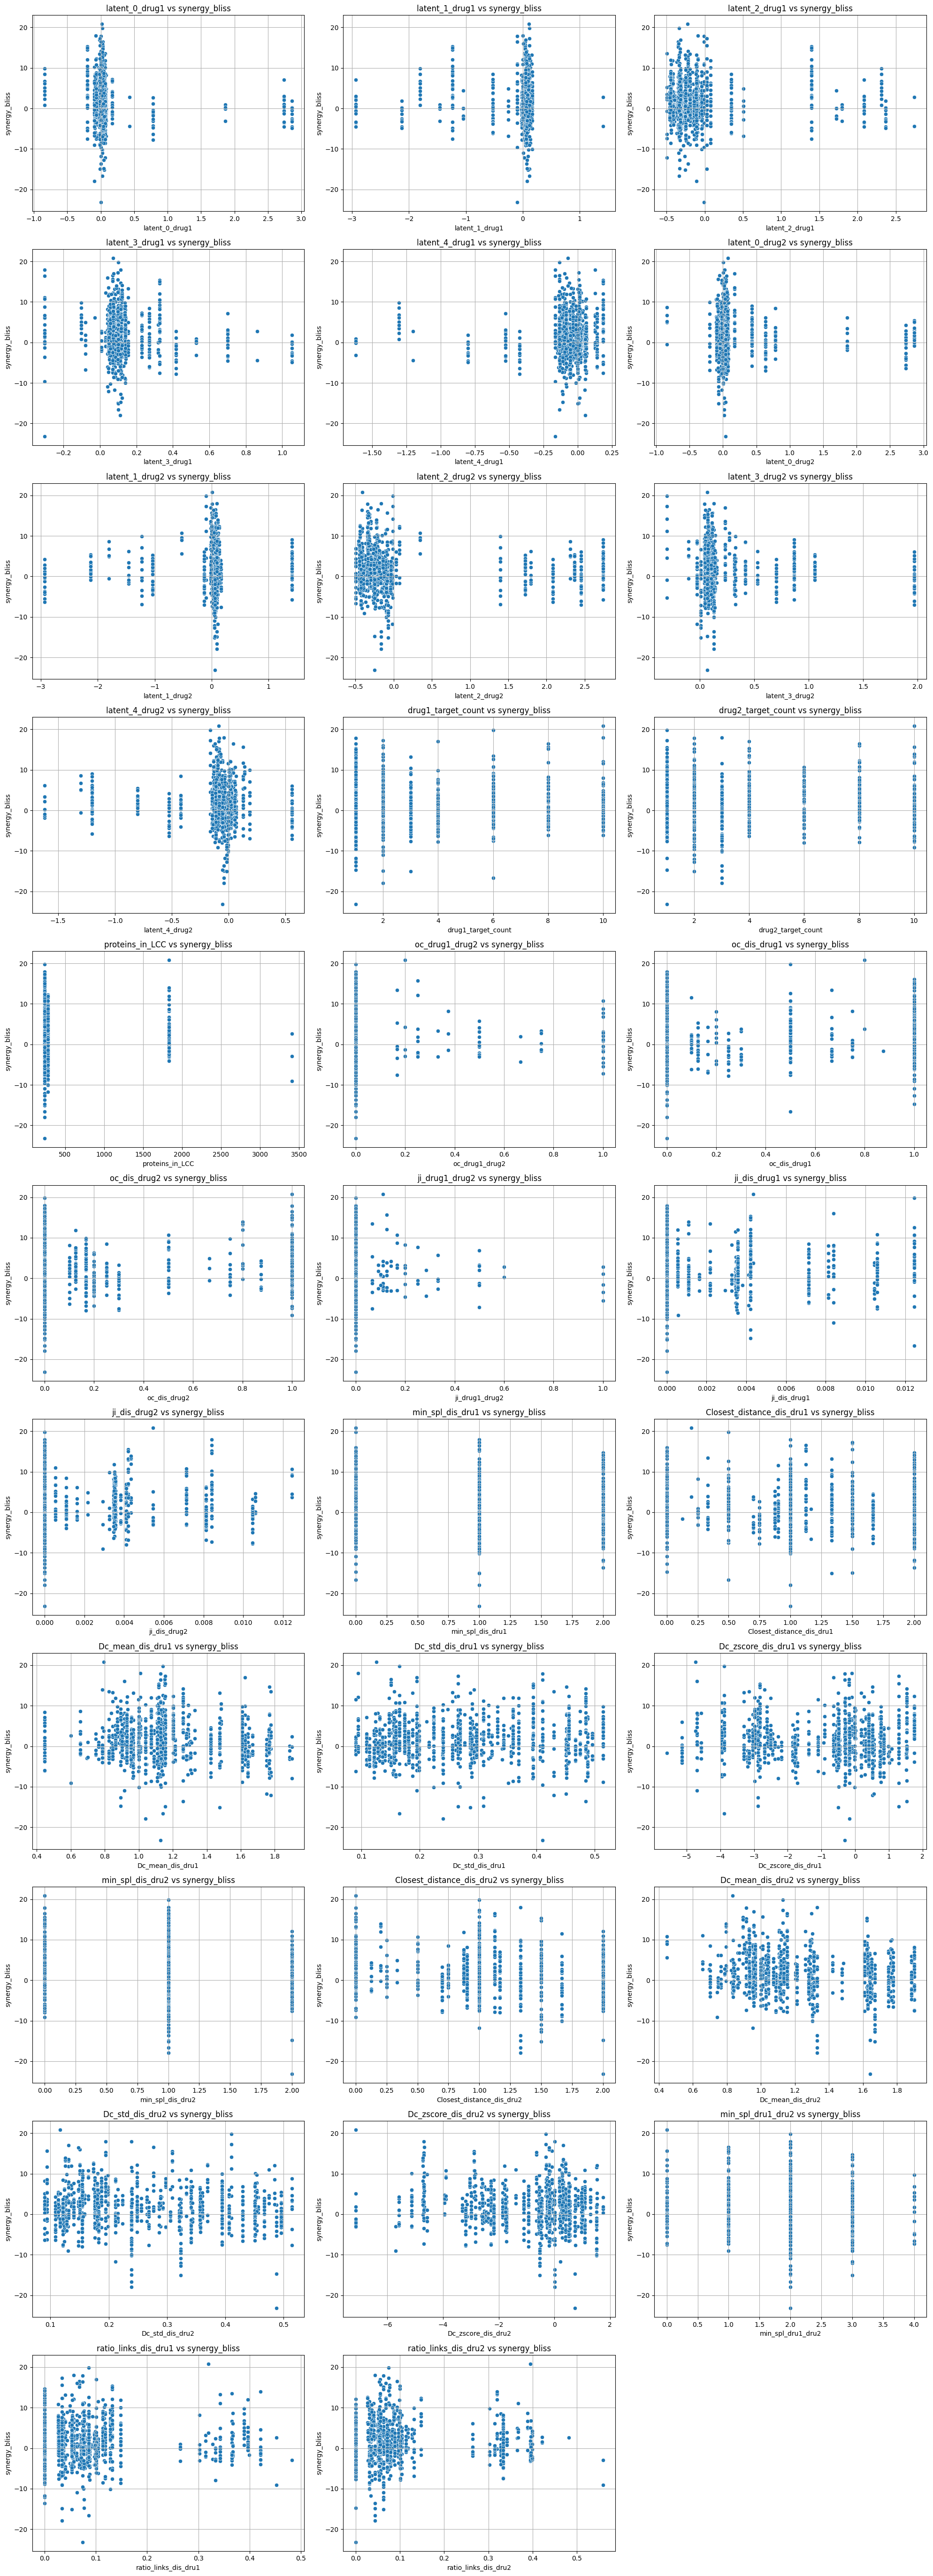

In [177]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the target variable
target = 'synergy_bliss'

# Select numerical columns (exclude target columns)
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_cols = [col for col in numerical_cols if col not in ['synergy_zip', 'synergy_loewe', 'synergy_hsa', 'synergy_bliss']]

# Set up the grid
n_cols = 3  # number of plots per row
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols  # number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))
axes = axes.flatten()  # flatten so we can index easily

# Plot each scatterplot
for idx, feature in enumerate(numerical_cols):
    sns.scatterplot(data=df, x=feature, y=target, ax=axes[idx])
    axes[idx].set_title(f'{feature} vs {target}')
    axes[idx].grid(True)

# Remove empty subplots
for i in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[i])


plt.tight_layout()
# Save the figure
plt.savefig(r"C:\Users\K6502\OneDrive\Desktop\TFM\datos\clean\images\scatterplots_vs_synergy_bliss.png", dpi=300, bbox_inches='tight')
plt.show()

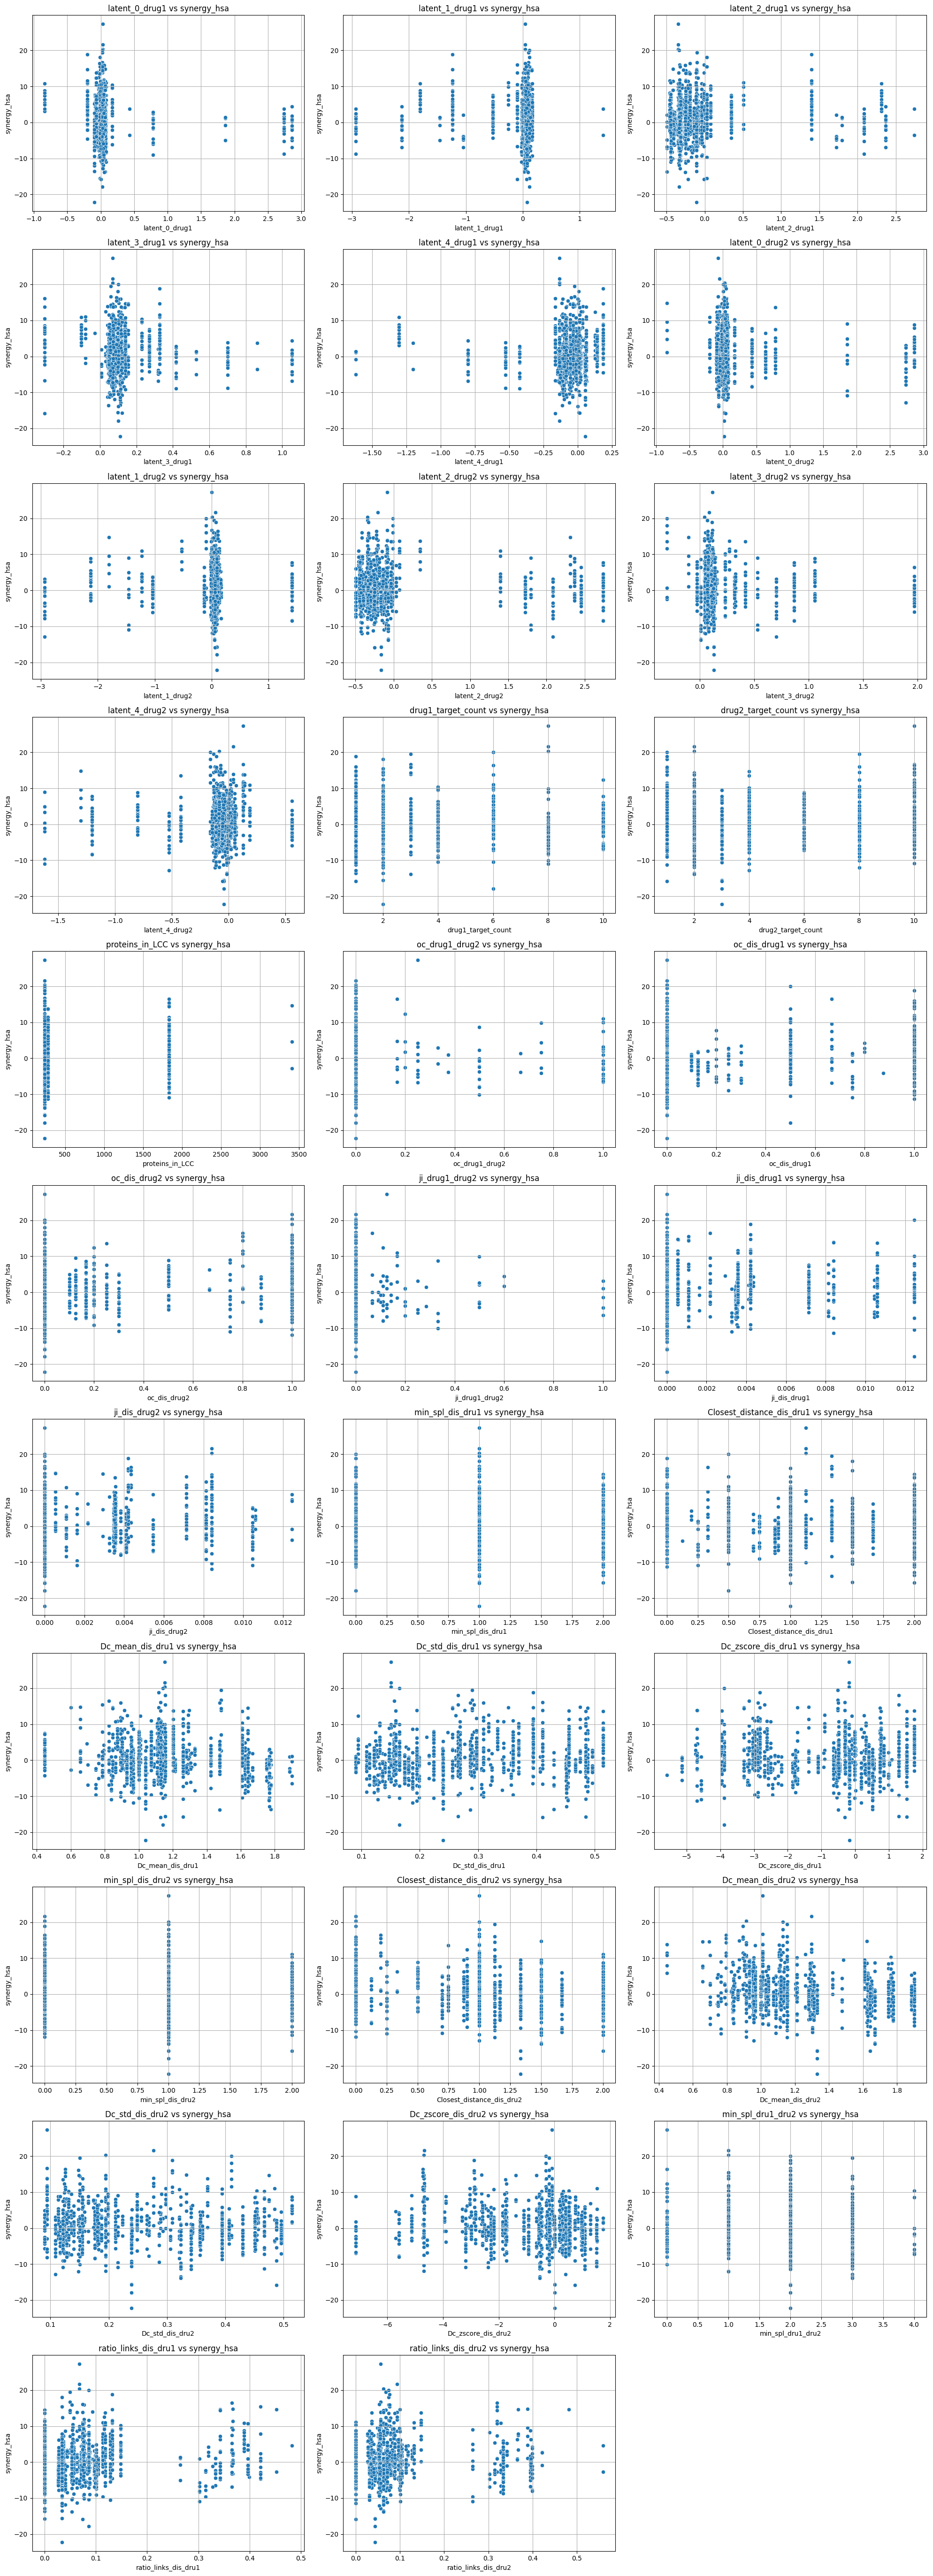

In [178]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the target variable
target = 'synergy_hsa'

# Select numerical columns (exclude target columns)
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_cols = [col for col in numerical_cols if col not in ['synergy_zip', 'synergy_loewe', 'synergy_hsa', 'synergy_bliss']]

# Set up the grid
n_cols = 3  # number of plots per row
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols  # number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))
axes = axes.flatten()  # flatten so we can index easily

# Plot each scatterplot
for idx, feature in enumerate(numerical_cols):
    sns.scatterplot(data=df, x=feature, y=target, ax=axes[idx])
    axes[idx].set_title(f'{feature} vs {target}')
    axes[idx].grid(True)

# Remove empty subplots
for i in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[i])


plt.tight_layout()
# Save the figure
plt.savefig(r"C:\Users\K6502\OneDrive\Desktop\TFM\datos\clean\images\scatterplots_vs_synergy_hsa.png", dpi=300, bbox_inches='tight')
plt.show()

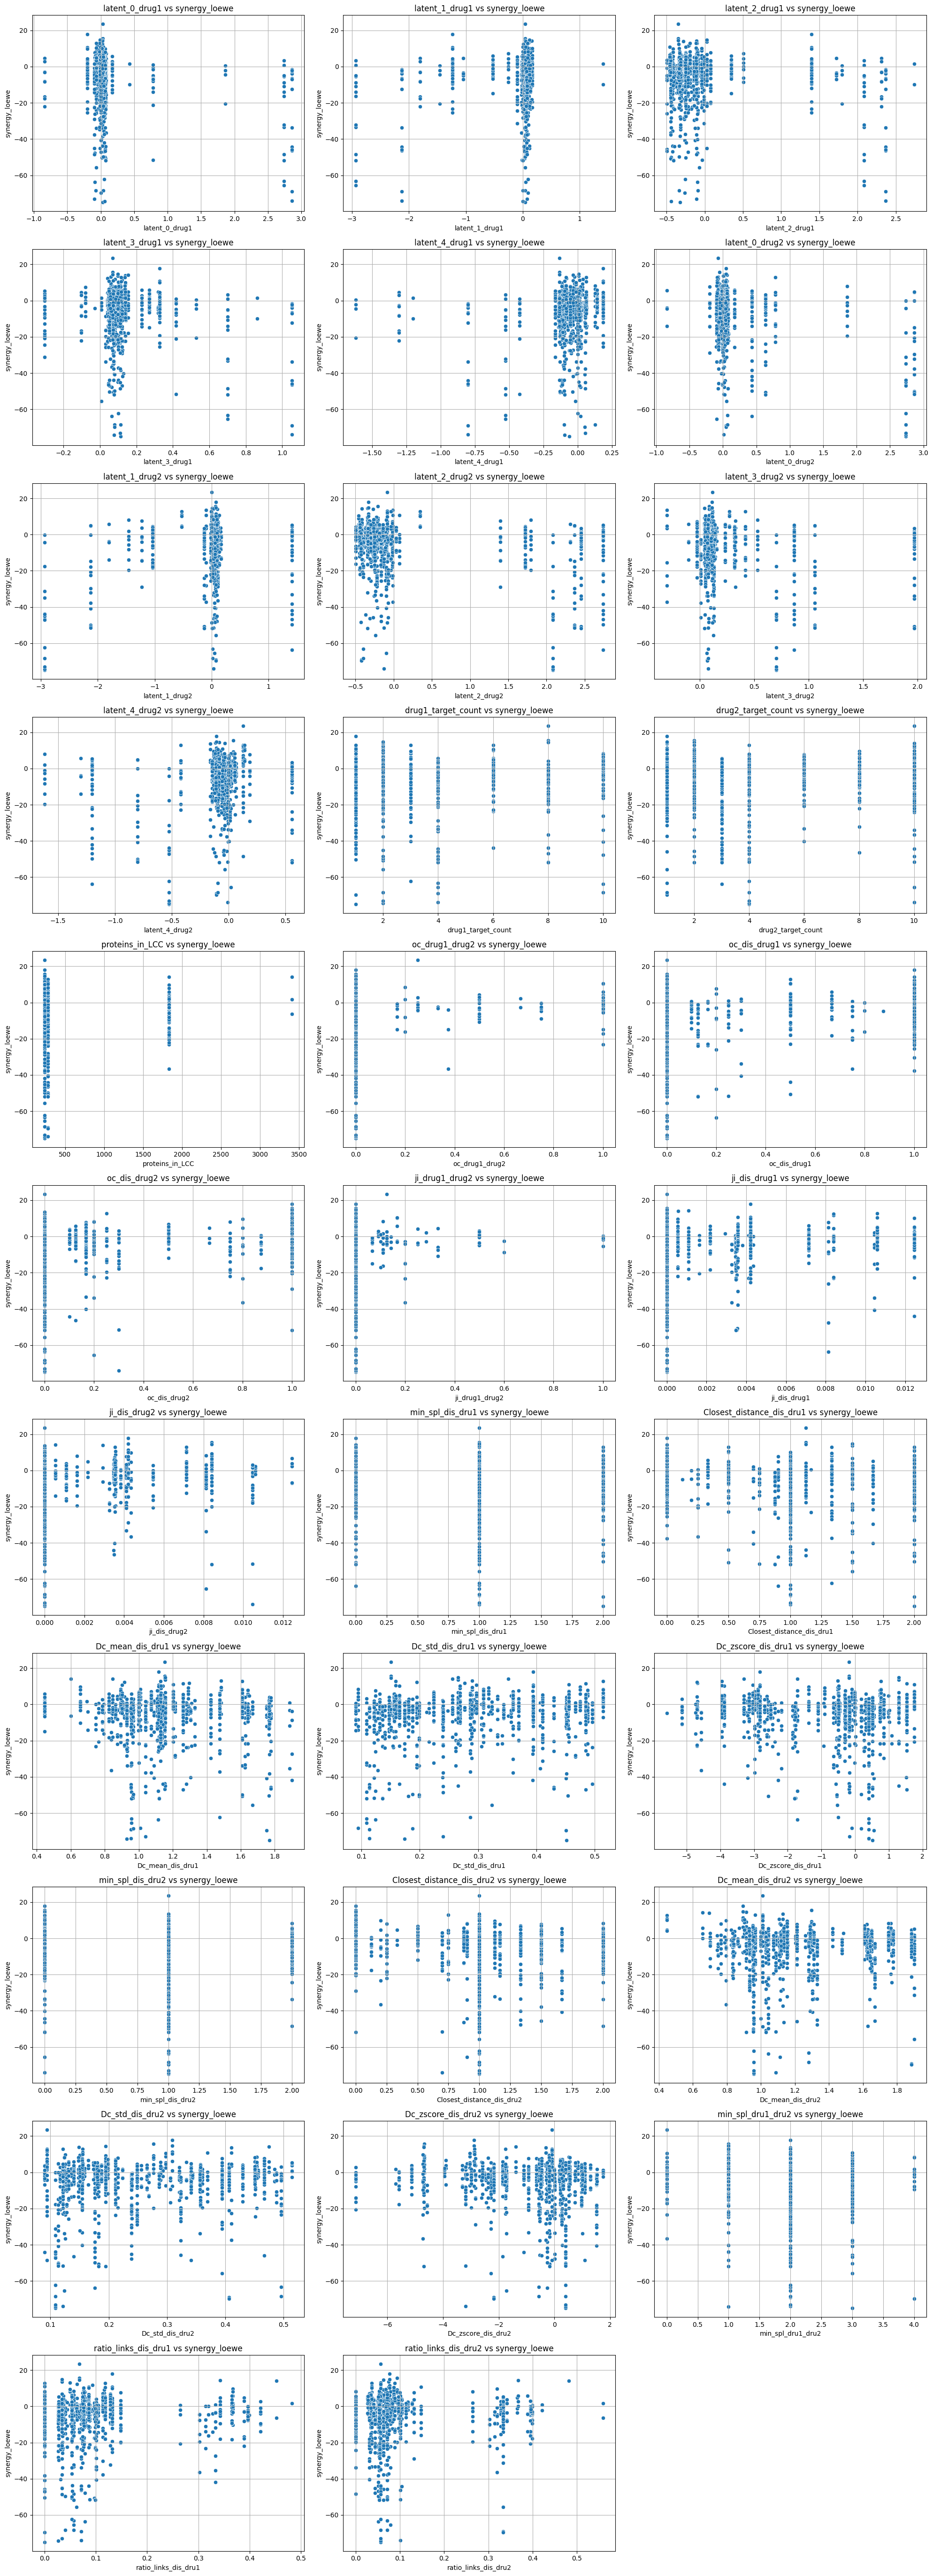

In [179]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the target variable
target = 'synergy_loewe'

# Select numerical columns (exclude target columns)
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_cols = [col for col in numerical_cols if col not in ['synergy_zip', 'synergy_loewe', 'synergy_hsa', 'synergy_bliss']]

# Set up the grid
n_cols = 3  # number of plots per row
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols  # number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))
axes = axes.flatten()  # flatten so we can index easily

# Plot each scatterplot
for idx, feature in enumerate(numerical_cols):
    sns.scatterplot(data=df, x=feature, y=target, ax=axes[idx])
    axes[idx].set_title(f'{feature} vs {target}')
    axes[idx].grid(True)

# Remove empty subplots
for i in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[i])


plt.tight_layout()
# Save the figure
plt.savefig(r"C:\Users\K6502\OneDrive\Desktop\TFM\datos\clean\images\scatterplots_vs_synergy_loewe.png", dpi=300, bbox_inches='tight')
plt.show()

**Correlations**

We will compute correlations between numeric features and the synergy scores.

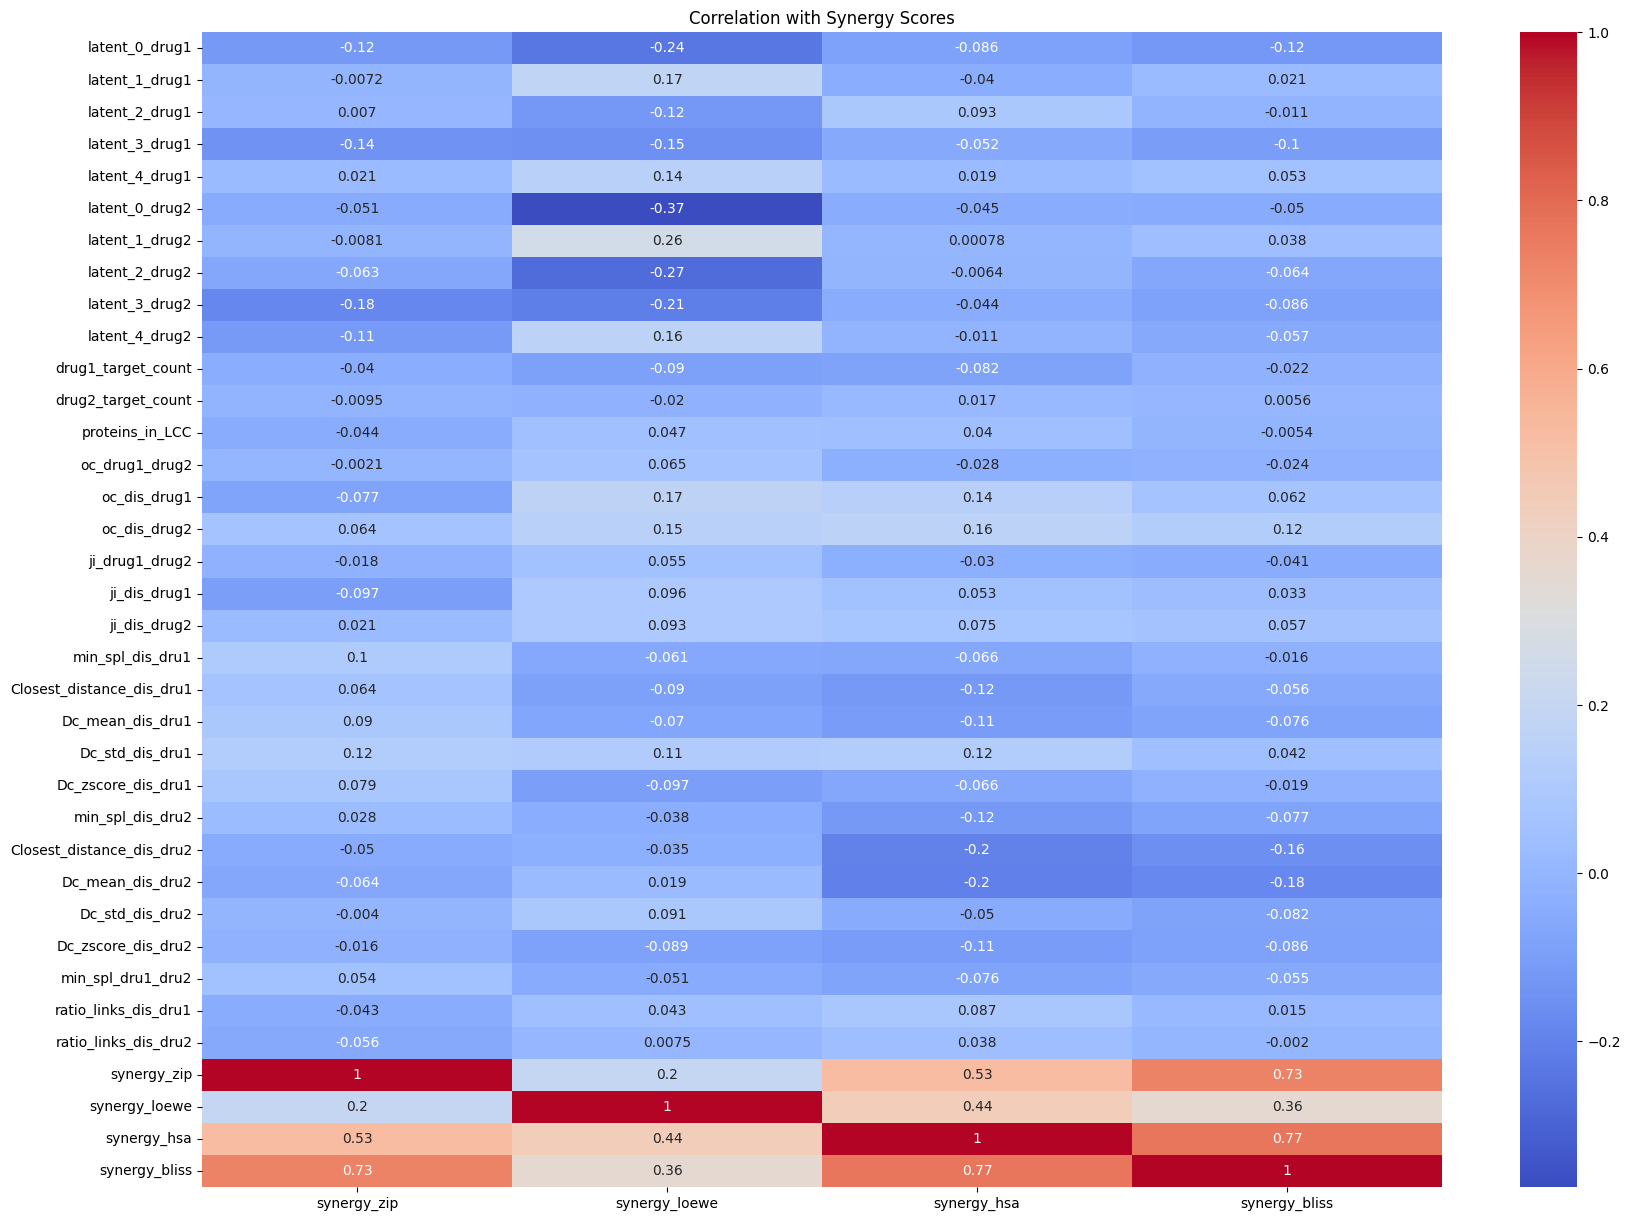

In [180]:
plt.figure(figsize=(20,15))


# Select only numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Now compute correlation matrix
corr = numeric_df.corr()

# Focus on correlations with synergy targets
synergy_corr = corr[['synergy_zip', 'synergy_loewe', 'synergy_hsa', 'synergy_bliss']]

sns.heatmap(synergy_corr, cmap='coolwarm', annot=True)
plt.title('Correlation with Synergy Scores')
plt.savefig(r"C:\Users\K6502\OneDrive\Desktop\TFM\datos\clean\images\correlation", dpi=300, bbox_inches='tight')
plt.show()


ahora con pearson y spearman pero no se ve nada

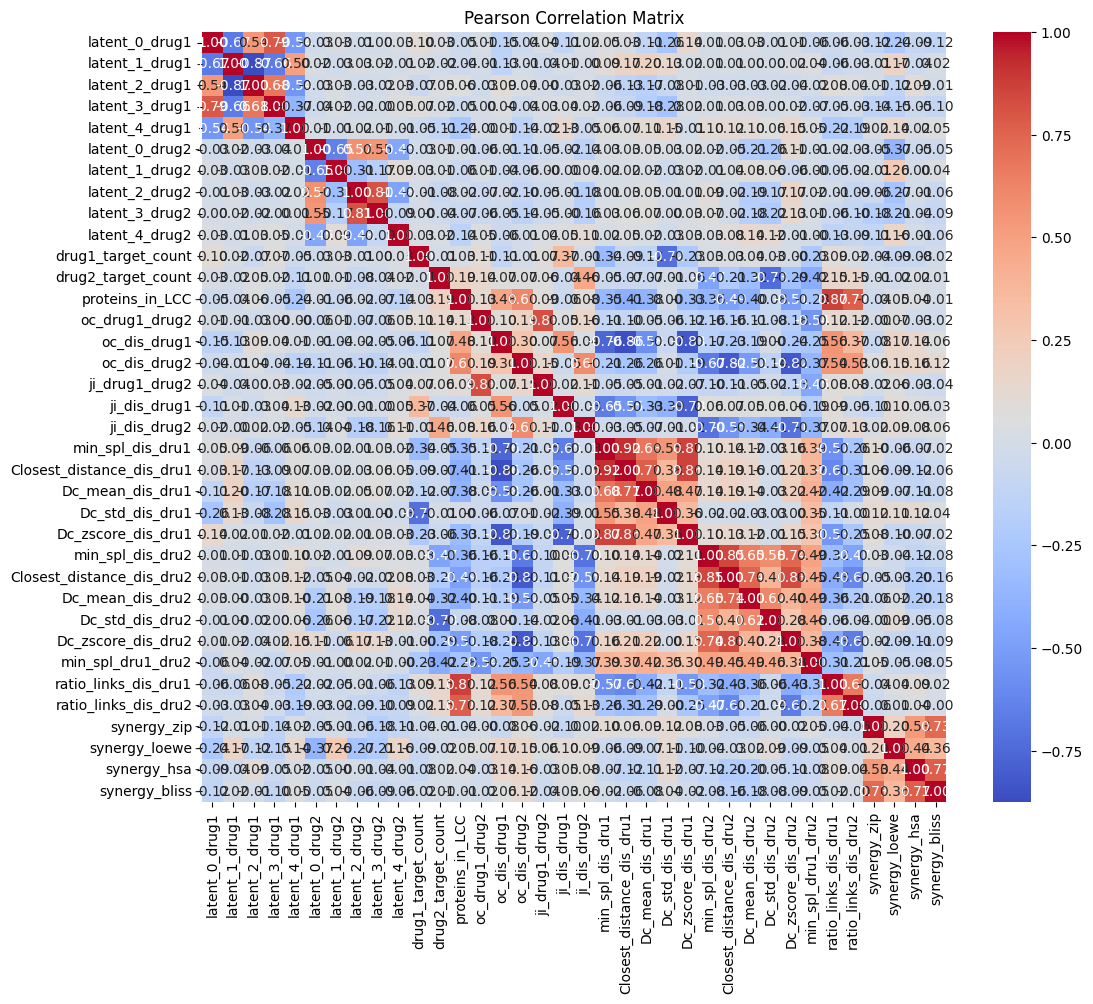

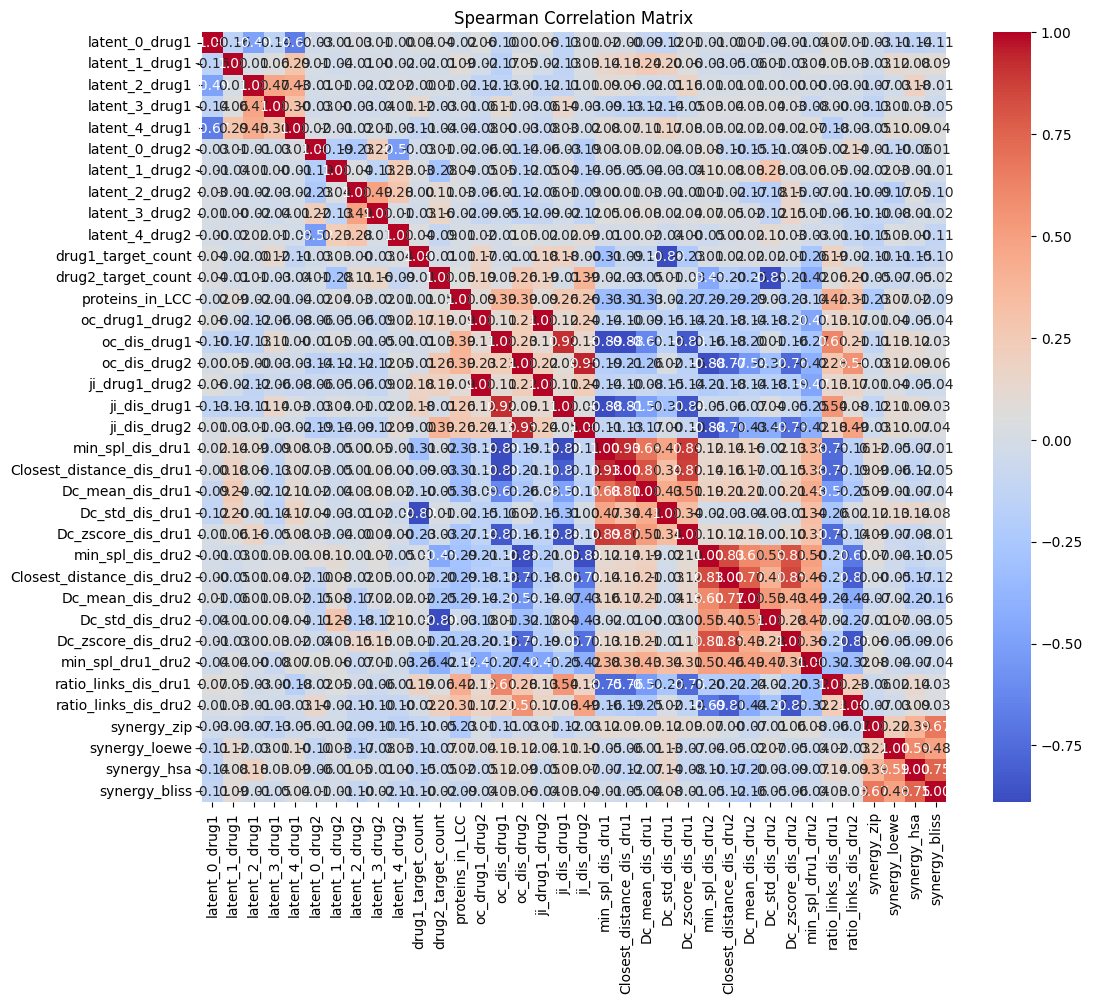

In [181]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is already loaded as df

# 1. Pearson correlation matrix
numeric_df = df.select_dtypes(include=[float, int])

pearson_corr = numeric_df.corr(method='pearson')

# 2. Spearman correlation matrix
spearman_corr = numeric_df.corr(method='spearman')

# Optional: plot as heatmaps
plt.figure(figsize=(12, 10))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Matrix')
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation Matrix')
plt.show()


## Categorical features

In [182]:
# Get columns with object or categorical data types
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Categorical columns:")
print(categorical_cols)

Categorical columns:
['dname_drug1', 'molecular_formula_drug1', 'smiles_drug1', 'dname_drug2', 'molecular_formula_drug2', 'smiles_drug2', 'cell_line_name', 'disease_cui']


In [183]:
df[categorical_cols].head()


dname_drug1 molecular_formula_drug1          smiles_drug1 dname_drug2  \
0  5-Fluorouracil               C4H3FN2O2  C1=C(C(=O)NC(=O)N1)F  Bortezomib   
1  5-Fluorouracil               C4H3FN2O2  C1=C(C(=O)NC(=O)N1)F   Dasatinib   
2  5-Fluorouracil               C4H3FN2O2  C1=C(C(=O)NC(=O)N1)F   Erlotinib   
3  5-Fluorouracil               C4H3FN2O2  C1=C(C(=O)NC(=O)N1)F   Lapatinib   
4  5-Fluorouracil               C4H3FN2O2  C1=C(C(=O)NC(=O)N1)F   Sorafenib   

  molecular_formula_drug2                                       smiles_drug2  \
0             C19H25BN4O4  B(C(CC(C)C)NC(=O)C(CC1=CC=CC=C1)NC(=O)C2=NC=CN...   
1           C22H26ClN7O2S  CC1=C(C(=CC=C1)Cl)NC(=O)C2=CN=C(S2)NC3=NC(=NC(...   
2              C22H23N3O4  COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...   
3          C29H26ClFN4O4S  CS(=O)(=O)CCNCC1=CC=C(O1)C2=CC3=C(C=C2)N=CN=C3...   
4          C21H16ClF3N4O3  CNC(=O)C1=NC=CC(=C1)OC2=CC=C(C=C2)NC(=O)NC3=CC...   

  cell_line_name disease_cui  
0           HT29    C0338106  
1           HT29    C0338106  
2           HT29    C0338106  
3           HT29    C0338106  
4           HT29    C0338106

for now we are not going to take into account molecular formulas and SMILES

In [184]:
df = df.drop(columns=['molecular_formula_drug1','molecular_formula_drug2','smiles_drug1','smiles_drug2'])

In [185]:
# Print number of unique values per categorical column
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")

dname_drug1: 34 unique values
dname_drug2: 31 unique values
cell_line_name: 4 unique values
disease_cui: 4 unique values


**EDA of categorical features**

Boxpliot of caregorical features

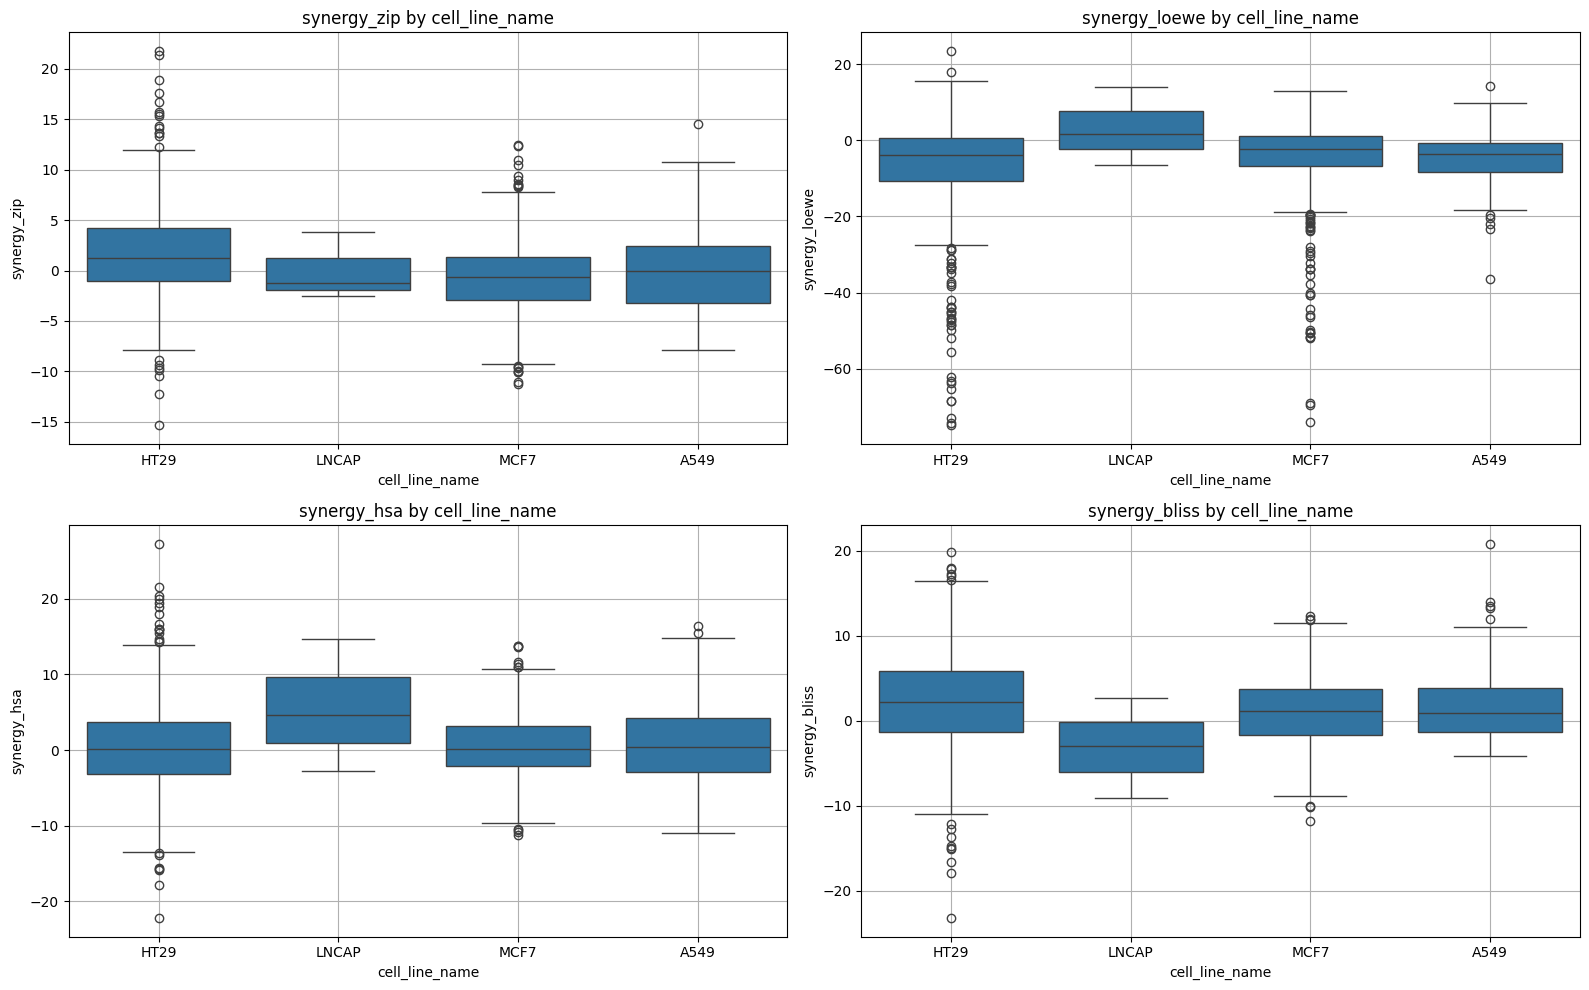

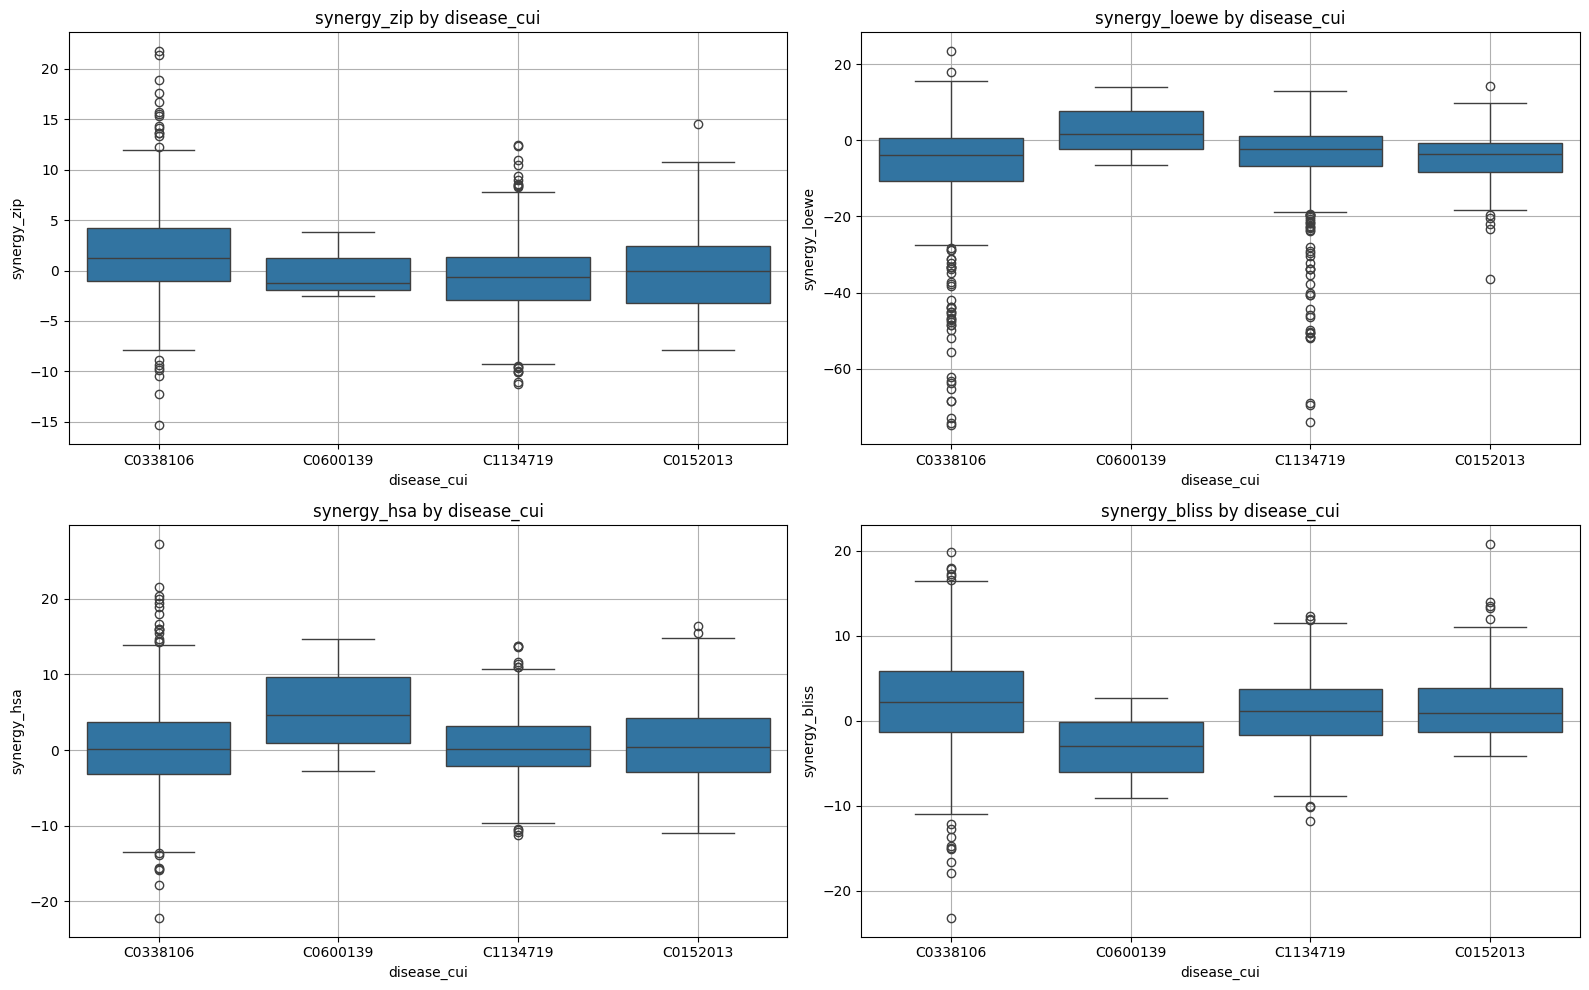

In [186]:
import seaborn as sns
import matplotlib.pyplot as plt

# Categorical columns to group by
categorical_cols = ['cell_line_name', 'disease_cui']

# Synergy target columns
synergy_targets = ['synergy_zip', 'synergy_loewe', 'synergy_hsa', 'synergy_bliss']

# Loop over each categorical feature
for cat_col in categorical_cols:
    # Set up the figure for this categorical feature
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    axes = axes.flatten()
    
    for idx, target in enumerate(synergy_targets):
        sns.boxplot(x=cat_col, y=target, data=df, ax=axes[idx])
        axes[idx].set_title(f'{target} by {cat_col}')
        axes[idx].set_xlabel(cat_col)
        axes[idx].set_ylabel(target)
        axes[idx].grid(True)
    
    plt.tight_layout()
    plt.show()


 "Is the mean (or distribution) of synergy scores significantly different between the categories of each categorical feature?"
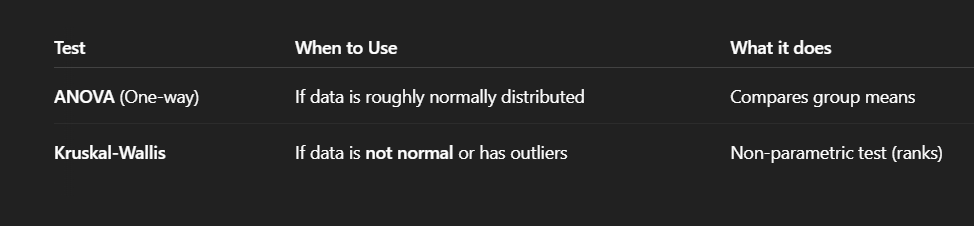

* p < 0.05 → Statistically significant differences between groups.
* p ≥ 0.05 → No evidence the distributions differ across groups.


This gives you a formal test to back up what you see in the boxplots.



In [187]:
from scipy.stats import kruskal

# Categorical columns to test
categorical_cols = ['cell_line_name', 'disease_cui']
synergy_targets = ['synergy_zip', 'synergy_loewe', 'synergy_hsa', 'synergy_bliss']

# Run Kruskal-Wallis test for each synergy score grouped by each categorical variable
for cat_col in categorical_cols:
    print(f"\n=== Testing for {cat_col} ===")
    for target in synergy_targets:
        groups = [group[target].values for _, group in df.groupby(cat_col)]
        stat, p = kruskal(*groups)
        print(f"{target}: H={stat:.3f}, p={p:.4f} → {'Significant' if p < 0.05 else 'Not significant'}")



=== Testing for cell_line_name ===
synergy_zip: H=60.339, p=0.0000 → Significant
synergy_loewe: H=12.335, p=0.0063 → Significant
synergy_hsa: H=1.506, p=0.6808 → Not significant
synergy_bliss: H=12.626, p=0.0055 → Significant

=== Testing for disease_cui ===
synergy_zip: H=60.339, p=0.0000 → Significant
synergy_loewe: H=12.335, p=0.0063 → Significant
synergy_hsa: H=1.506, p=0.6808 → Not significant
synergy_bliss: H=12.626, p=0.0055 → Significant


**Encoding of categorical features**

First, encode dname_drug1, dname_drug2

In [188]:
# Get all unique drug names
all_drugs = pd.unique(df[['dname_drug1', 'dname_drug2']].values.ravel())

In [189]:
# Build a mapping dictionary
drug_to_int = {drug: idx for idx, drug in enumerate(sorted(all_drugs))}

In [190]:
drug_to_int

{'5-Fluorouracil': 0,
 '6-Mercaptopurine': 1,
 'Bortezomib': 2,
 'Crizotinib': 3,
 'Dasatinib': 4,
 'Erlotinib': 5,
 'Gefitinib': 6,
 'IMIQUIMOD': 7,
 'Imatinib': 8,
 'Ixabepilone': 9,
 'Lapatinib': 10,
 'Lenalidomide': 11,
 'Nilotinib': 12,
 'Pralatrexate': 13,
 'Romidepsin': 14,
 'Ruxolitinib': 15,
 'Sorafenib': 16,
 'Sunitinib': 17,
 'Vandetanib': 18,
 'Vemurafenib': 19,
 'Vismodegib': 20,
 'Vorinostat': 21,
 'allopurinol': 22,
 'anastrozole': 23,
 'celecoxib': 24,
 'doxorubicin': 25,
 'etoposide': 26,
 'gemcitabine': 27,
 'hydroxyurea': 28,
 'letrozole': 29,
 'metformin': 30,
 'mitoxantrone': 31,
 'raloxifene': 32,
 'thalidomide': 33}

In [191]:
# Map both columns
df['dname_drug1_enc'] = df['dname_drug1'].map(drug_to_int)
df['dname_drug2_enc'] = df['dname_drug2'].map(drug_to_int)


In [192]:
df = df.drop(['dname_drug1', 'dname_drug2'], axis=1)

Enocde the rest as label encoding 

In [195]:
from sklearn.preprocessing import LabelEncoder

# Columns to encode
cols_to_label_encode = ['cell_line_name', 'disease_cui']

# Initialize the label encoder
le = LabelEncoder()

# Apply label encoding to each column
for col in cols_to_label_encode:
    df[col] = le.fit_transform(df[col])

In [196]:
df

cell_line_name  disease_cui  latent_0_drug1  latent_1_drug1  \
0                 1            1        0.038676        0.060642   
1                 1            1        0.038676        0.060642   
2                 1            1        0.038676        0.060642   
3                 1            1        0.038676        0.060642   
4                 1            1        0.038676        0.060642   
..              ...          ...             ...             ...   
990               3            3       -0.065987        0.087140   
991               3            3        0.063310        0.133210   
992               1            1        0.003755       -0.098752   
993               3            3        0.040340        0.002213   
994               1            1        0.046976        0.076442   

     latent_2_drug1  latent_3_drug1  latent_4_drug1  latent_0_drug2  \
0         -0.250747        0.069042       -0.053469        0.432284   
1         -0.250747        0.069042       -0.053469       -0.071840   
2         -0.250747        0.069042       -0.053469       -0.053044   
3         -0.250747        0.069042       -0.053469        0.025083   
4         -0.250747        0.069042       -0.053469       -0.090320   
..              ...             ...             ...             ...   
990       -0.112513        0.114887        0.061215       -0.016287   
991        0.078170        0.084622       -0.055479        0.634798   
992       -0.011383       -0.303566       -0.162485        0.432284   
993       -0.459703        0.049285       -0.094661       -0.016287   
994       -0.328589        0.112226       -0.107758        0.038676   

     latent_1_drug2  latent_2_drug2  ...  Dc_zscore_dis_dru2  \
0          1.410122        2.739043  ...           -0.251656   
1         -0.000804       -0.086574  ...           -0.094816   
2          0.069181       -0.208350  ...           -4.680420   
3          0.012112       -0.339005  ...           -4.695010   
4          0.052981       -0.095042  ...           -1.721117   
..              ...             ...  ...                 ...   
990        0.094303       -0.190999  ...            0.762444   
991       -0.132449        2.454480  ...           -0.166498   
992        1.410122        2.739043  ...           -0.251656   
993        0.094303       -0.190999  ...            0.762444   
994        0.060642       -0.250747  ...            0.734081   

     min_spl_dru1_dru2  ratio_links_dis_dru1  ratio_links_dis_dru2  \
0                  2.0              0.000000              0.051242   
1                  2.0              0.000000              0.056534   
2                  2.0              0.000000              0.093802   
3                  2.0              0.000000              0.063246   
4                  2.0              0.000000              0.078511   
..                 ...                   ...                   ...   
990                2.0              0.118308              0.000000   
991                2.0              0.148148              0.053768   
992                2.0              0.074074              0.051242   
993                2.0              0.085821              0.000000   
994                2.0              0.076493              0.000000   

     synergy_zip  synergy_loewe  synergy_hsa  synergy_bliss  dname_drug1_enc  \
0       2.112442      -1.463338     3.058471       2.248301                0   
1      -0.328969       5.718725     8.312947      -1.322924                0   
2       5.587444       7.534030    11.718616       7.199109                0   
3       4.276271       4.662611     7.422306       3.063497                0   
4      -2.697573      -6.012544     1.589405      -3.748079                0   
..           ...            ...          ...            ...              ...   
990     2.007334       4.869263     6.344526       3.422500               18   
991     1.339214       0.900087     1.432115       1.710700               31   
992  

In [197]:
# List of columns to move
start_cols = ['dname_drug1_enc', 'dname_drug2_enc']
end_cols = ['synergy_zip', 'synergy_loewe', 'synergy_hsa', 'synergy_bliss']

# Get the list of middle columns
middle_cols = [col for col in df.columns if col not in start_cols + end_cols]

# Reorder the DataFrame
df = df[start_cols + middle_cols + end_cols]

In [198]:
df

dname_drug1_enc  dname_drug2_enc  cell_line_name  disease_cui  \
0                  0                2               1            1   
1                  0                4               1            1   
2                  0                5               1            1   
3                  0               10               1            1   
4                  0               16               1            1   
..               ...              ...             ...          ...   
990               18                0               3            3   
991               31                2               3            3   
992               31                2               1            1   
993                6                0               3            3   
994                6                0               1            1   

     latent_0_drug1  latent_1_drug1  latent_2_drug1  latent_3_drug1  \
0          0.038676        0.060642       -0.250747        0.069042   
1          0.038676        0.060642       -0.250747        0.069042   
2          0.038676        0.060642       -0.250747        0.069042   
3          0.038676        0.060642       -0.250747        0.069042   
4          0.038676        0.060642       -0.250747        0.069042   
..              ...             ...             ...             ...   
990       -0.065987        0.087140       -0.112513        0.114887   
991        0.063310        0.133210        0.078170        0.084622   
992        0.003755       -0.098752       -0.011383       -0.303566   
993        0.040340        0.002213       -0.459703        0.049285   
994        0.046976        0.076442       -0.328589        0.112226   

     latent_4_drug1  latent_0_drug2  ...  Dc_mean_dis_dru2  Dc_std_dis_dru2  \
0         -0.053469        0.432284  ...          1.044333         0.176166   
1         -0.053469       -0.071840  ...          1.008900         0.093866   
2         -0.053469       -0.053044  ...          1.297000         0.277112   
3         -0.053469        0.025083  ...          0.914500         0.194781   
4         -0.053469       -0.090320  ...          1.113500         0.124047   
..              ...             ...  ...               ...              ...   
990        0.061215       -0.016287  ...          1.608000         0.514136   
991       -0.055479        0.634798  ...          1.030333         0.182184   
992       -0.162485        0.432284  ...          1.044333         0.176166   
993       -0.094661       -0.016287  ...          1.608000         0.514136   
994       -0.107758        0.038676  ...          1.642000         0.487684   

     Dc_zscore_dis_dru2  min_spl_dru1_dru2  ratio_links_dis_dru1  \
0             -0.251656                2.0              0.000000   
1             -0.094816                2.0              0.000000   
2             -4.680420                2.0              0.000000   
3             -4.695010                2.0              0.000000   
4             -1.721117                2.0              0.000000   
..                  ...                ...                   ...   
990            0.762444                2.0              0.118308   
991           -0.166498                2.0              0.148148   
992           -0.251656                2.0              0.074074   
993            0.762444                2.0              0.085821   
994            0.734081                2.0              0.076493   

     ratio_links_dis_dru2  synergy_zip  synergy_loewe  synergy_hsa  \
0                0.051242     2.112442      -1.463338     3.058471   
1                0.056534    -0.328969       5.718725     8.312947   
2                0.093802     5.587444       7.534030    11.718616   
3                0.063246     4.276271       4.662611     7.422306   
4                0.078511    -2.697573      -6.012544     1.589405   
..                    ...          ...            ...          ...   
990              0.000000     2.007334       4.869263  

save this for later analysis 

In [199]:
import json

with open(r"C:\Users\K6502\OneDrive\Desktop\TFM\datos\clean\map_drug_encoding.json", 'w') as f:
    json.dump(drug_to_int, f)

In [200]:
df.to_csv(r"C:\Users\K6502\OneDrive\Desktop\TFM\datos\clean\dataset_encoded.csv", index=False)

**Conintue with EDA**

Next step would be feature engineering